In [158]:
from openai import OpenAI
import re

client = OpenAI(
    api_key = "c8a7e43e-cce1-4d61-af75-de350b7e5731",
    base_url = "https://ark.cn-beijing.volces.com/api/v3",
)

In [159]:
import argparse
import pdb

from builder import build
from util import DEFAULTS

In [160]:
# print("----- standard request -----")
# completion = client.chat.completions.create(
#     model = "deepseek-r1-250120",  # your model endpoint ID
#     messages = [
#         {
#             "role": "user", 
#             "content": "1+1=?"
#         },
#     ],
# )

In [161]:
# print("----- Reasoning content -----")
# print(completion.choices[0].message.reasoning_content)

In [162]:
# print("----- Content -----")
# print(completion.choices[0].message.content)

In [163]:
filename = '..\grammar_example.txt'
with open(filename) as file:
        grammer_example = [line for line in file]
grammer_example = ''.join(grammer_example)

In [164]:
quest = '根据文档中的GMBL的语法和示例，使用GMBL语法，生成一道角度计算相关的简单几何题的代码。请确保每个点在使用前都已经定义过，确保符合示例的GMBL语法，确保每一句语句都写在同一行，确保GMBL输入的角度是弧度制，确保没有直接定义数值对象。'

In [165]:
messages = [{
    "role": "user", 
    "content": grammer_example + '\n\n' + quest
    }]

In [166]:
response = client.chat.completions.create(
    # 替换 <Model> 为模型的Model ID
    model="deepseek-r1-250120",
    messages=messages,
    stream=True,
)
reasoning_content = ""
content = ""

for chunk in response:
    if hasattr(chunk.choices[0].delta, 'reasoning_content') and chunk.choices[0].delta.reasoning_content:
        reasoning_content += chunk.choices[0].delta.reasoning_content
        print(chunk.choices[0].delta.reasoning_content, end="")
    else:
        content += chunk.choices[0].delta.content
        print(chunk.choices[0].delta.content, end="")

好的，我需要根据用户提供的GMBL语法文档来生成一道角度计算的简单几何题。首先，我需要理解用户的要求：题目要涉及角度计算，结构简单，符合GMBL语法，并且每个点在使用前都已定义。

首先，回顾一下GMBL中的角度相关函数和断言。用户提到的uangle函数可以获取角度值，而assert和eval可以用来设置条件和验证结论。例如，可以定义三角形，设置某些角度，然后验证其他角度是否符合预期。

接下来，我需要确定题目的几何结构。可能选择三角形，因为角度计算在三角形中比较直观。比如，给定一个三角形，设置两个角，然后验证第三个角或某个中点形成的角度是否符合特定值。

根据示例14，用户可能希望使用uangle和assert来设定角度，再用eval来验证结果。比如，构造一个三角形ABC，设置两个角的大小，然后通过中点或其他点构造新的点，计算某个角度是否等于预期值。

需要注意GMBL中的角度单位是弧度，所以在设置时需要用pi的值。例如，直角是(pi/2)，而三角形的内角和为pi。因此，如果设定两个角分别为0.2pi和0.3pi，那么第三个角应为pi - 0.2pi - 0.3pi = 0.5pi，即直角。

接下来，考虑如何构造这样的题目。首先定义三角形ABC，设置角ABC和角BAC的角度，然后计算中点或其他点，最后验证某个角度是否为预期值。

例如，定义三角形ABC，设置角ABC为0.2pi，角BAC为0.3pi，然后找到边AB和AC的中点M和N，验证角ANM是否为0.5pi。或者，可能构造垂心、重心等，但为了简单，可能使用中点更合适。

参考示例14，用户使用了midp来定义中点，并验证角度。所以可以效仿：定义M为AB中点，N为AC中点，然后验证角ANM是否为直角（0.5pi）。

在构造过程中，必须确保所有点在使用前已定义。例如，先定义三角形ABC，然后定义M和N，之后在eval中使用这些点。

现在，检查是否符合所有语法规则。例如，param用来定义三角形ABC，使用assert来设置角度，然后定义中点，最后eval验证角度是否正确。

需要注意，用户要求不要直接定义数值对象，因此所有数值应通过函数计算，如mul pi 0.2等。

最后，确保每一句语句在同一行，没有语法错误，并且所有断言和eval正确使用predicate。

现在，综合这些考虑，生成代码。


``

In [167]:
print(content)
content



```GMBL
(param (A B C) triangle)
(define M point (midp A B))
(define N point (midp A C))
(assert (= (uangle A B C) (mul pi 0.2)))
(assert (= (uangle B A C) (mul pi 0.3)))
(eval (= (uangle A N M) (mul pi 0.5)))
```


'\n\n```GMBL\n(param (A B C) triangle)\n(define M point (midp A B))\n(define N point (midp A C))\n(assert (= (uangle A B C) (mul pi 0.2)))\n(assert (= (uangle B A C) (mul pi 0.3)))\n(eval (= (uangle A N M) (mul pi 0.5)))\n```'

In [168]:
re_find = re.finditer('```', content)
inds = []
for ind in re_find:
    inds += [ind.span()]
assert(len(inds) == 2)

lines = content[inds[0][1] : inds[1][0]]
lines = lines.splitlines()[1:]

print(lines)

['(param (A B C) triangle)', '(define M point (midp A B))', '(define N point (midp A C))', '(assert (= (uangle A B C) (mul pi 0.2)))', '(assert (= (uangle B A C) (mul pi 0.3)))', '(eval (= (uangle A N M) (mul pi 0.5)))']


In [169]:
# Parse arguments
parser = argparse.ArgumentParser(description='Arguments for building a model that satisfies a set of geometry constraints')

# General arguments
parser.add_argument('--problem', '-p', action='store', type=str, help='Name of the file defining the set of constraints')
parser.add_argument('--dir', '-d', action='store', type=str, help='Directory containing problem files.')
parser.add_argument('--regularize_points', action='store', dest='regularize_points', type=float, default=DEFAULTS["regularize_points"])
parser.add_argument('--make_distinct', action='store', dest='make_distinct', type=float, default=DEFAULTS["make_distinct"])
parser.add_argument('--distinct_prob', action='store', dest='distinct_prob', type=float, default=DEFAULTS["distinct_prob"])
parser.add_argument('--min_dist', action='store', dest='min_dist', type=float, default=DEFAULTS["min_dist"])
parser.add_argument('--ndg_loss', action='store', dest='ndg_loss', type=float, default=DEFAULTS["ndg_loss"])

parser.add_argument('--n_models', action='store', dest='n_models', type=int, default=DEFAULTS['n_models'])
parser.add_argument('--n_tries', action='store', dest='n_tries', type=int, default=DEFAULTS['n_tries'])
parser.add_argument('--n_inits', action='store', dest='n_inits', type=int, default=DEFAULTS['n_inits'])
parser.add_argument('--verbosity', action='store', dest='verbosity', type=int, default=DEFAULTS['verbosity'])
parser.add_argument('--enforce_goals', dest='enforce_goals', action='store_true')
parser.add_argument('--plot_freq', action='store', dest='plot_freq', type=int, default=DEFAULTS['plot_freq'])
parser.add_argument('--loss_freq', action='store', dest='loss_freq', type=int, default=DEFAULTS['loss_freq'])
parser.add_argument('--losses_freq', action='store', dest='losses_freq', type=int, default=DEFAULTS['losses_freq'])

parser.add_argument('--unnamed_objects', dest='unnamed_objects', action='store_true')
parser.add_argument('--no_unnamed_objects', dest='unnamed_objects', action='store_false')
parser.set_defaults(unnamed_objects=True)

# Tensorflow arguments
parser.add_argument('--learning_rate', action='store', dest='learning_rate', type=float, default=DEFAULTS["learning_rate"])
parser.add_argument('--decay_steps', action='store', dest='decay_steps', type=float, default=DEFAULTS["decay_steps"])
parser.add_argument('--decay_rate', action='store', dest='decay_rate', type=float, default=DEFAULTS["decay_rate"])
parser.add_argument('--n_iterations', action='store', dest='n_iterations', type=int, default=DEFAULTS["n_iterations"])
parser.add_argument('--eps', action='store', dest='eps', type=float, default=DEFAULTS["eps"])

parser.add_argument('--experiment', dest='experiment', action='store_true')

parser.add_argument("--f", type=str, default='abc.def')


args = parser.parse_args()
args = vars(args)

In [170]:
args['n_tries'] = 10
args['eps'] = 3e-4

args['lines'] = lines
lines

['(param (A B C) triangle)',
 '(define M point (midp A B))',
 '(define N point (midp A C))',
 '(assert (= (uangle A B C) (mul pi 0.2)))',
 '(assert (= (uangle B A C) (mul pi 0.3)))',
 '(eval (= (uangle A N M) (mul pi 0.5)))']

Processing instructions...:   0%|          | 0/6 [00:00<?, ?it/s]

INPUT INSTRUCTIONS:
sample (A B C) triangle ()
define M ((midp A B))
define N ((midp A C))
assert (eq-n (uangle A B C) (mul 3.141592653589793 0.2))
assert (eq-n (uangle B A C) (mul 3.141592653589793 0.3))
eval (eq-n (uangle A N M) (mul 3.141592653589793 0.5))


Sampling initializations...: 100%|██████████| 10/10 [00:14<00:00,  1.43s/it]


[     0]   0.009429565003 ||   0.100000
======== Print losses ==========
-- Losses --
  eq-n_(uangle A B C)_(mul 3.141592653589793 0.2)    0.0058972200
  eq-n_(uangle B A C)_(mul 3.141592653589793 0.3)    0.0035317394
  points                                             0.0000005988
  distinct                                           0.0000000068
-- Goals --
  eq-n_(uangle A N M)_(mul 3.141592653589793 0.5)    0.0003015392
-- NDGs --


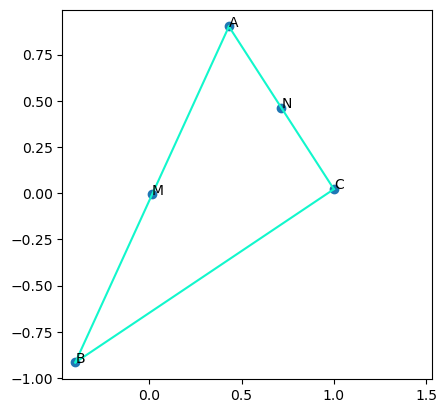

======== Print losses ==========
-- Losses --
  eq-n_(uangle A B C)_(mul 3.141592653589793 0.2)    0.0000538015
  eq-n_(uangle B A C)_(mul 3.141592653589793 0.3)    0.0000684273
  points                                             0.0000005838
  distinct                                           0.0000000003
-- Goals --
  eq-n_(uangle A N M)_(mul 3.141592653589793 0.5)    0.0002435744
-- NDGs --


Found 1 models


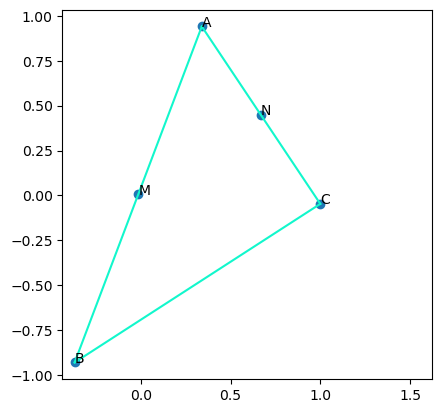

In [171]:
res = build(args)

In [172]:
for item in res[0]:
    print(item)

print('\n##############################################')

for item in res[1][0]:
    print(item)

(param (A B C) triangle)
(define M point (midp A B))
(define N point (midp A C))
(assert (= (uangle A B C) (mul pi 0.2)))
(assert (= (uangle B A C) (mul pi 0.3)))
(eval (= (uangle A N M) (mul pi 0.5)))

##############################################
{<primitives.Point object at 0x000002149FD757C0>: TfPoint(x=0.3393273871480633, y=0.9406683391776659), <primitives.Point object at 0x000002149E093C70>: TfPoint(x=-0.36851910509823216, y=-0.9296201746829713), <primitives.Point object at 0x000002149E093730>: TfPoint(x=0.9989091833005571, y=-0.04669521943212112), <primitives.Point object at 0x000002149E093190>: TfPoint(x=-0.01459585897508442, y=0.005524082247347295), <primitives.Point object at 0x000002149E1714F0>: TfPoint(x=0.6691182852243103, y=0.4469865598727724)}
{}
{}
[(TfPoint(x=0.3393273871480633, y=0.9406683391776659), TfPoint(x=-0.36851910509823216, y=-0.9296201746829713)), (TfPoint(x=-0.36851910509823216, y=-0.9296201746829713), TfPoint(x=0.9989091833005571, y=-0.04669521943212112)),

In [173]:
for obj_name, obj in res[1][0].named_points.items():
    print(obj_name)
    print(obj)
    (x, y) = obj

for obj_name, obj in res[1][0].named_lines.items():
    print(obj_name)
    print(obj)
    (x, y), r = obj
    # slope = y/x, intercept = r

for obj_name, obj in res[1][0].named_circles.items():
    print(obj_name)
    print(obj)
    (x, y), r = obj

A
(coords 0.339327 0.940668)
B
(coords -0.368519 -0.929620)
C
(coords 0.998909 -0.046695)
M
(coords -0.014596 0.005524)
N
(coords 0.669118 0.446987)
